In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from llm_toolkit.logical_reasoning_utils import *

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py


In [5]:
model_name = "Qwen2-72B-Instruct"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [6]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   text                                                           3000 non-null   object
 1   label                                                          3000 non-null   object
 2   title                                                          3000 non-null   object
 3   puzzle                                                         3000 non-null   object
 4   truth                                                          3000 non-null   object
 5   Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf                 3000 non-null   object
 6   Qwen/Qwen2-72B-Instruct/checkpoint-35_torch.bfloat16_4bit_lf   3000 non-null   object
 7   Qwen/Qwen2-72B-Instruct/checkpoint-70_torch.bfloat16_4bit_lf   3000 n

In [7]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf',
 'Qwen/Qwen2-72B-Instruct/checkpoint-35_torch.bfloat16_4bit_lf',
 'Qwen/Qwen2-72B-Instruct/checkpoint-70_torch.bfloat16_4bit_lf',
 'Qwen/Qwen2-72B-Instruct/checkpoint-105_torch.bfloat16_4bit_lf',
 'Qwen/Qwen2-72B-Instruct/checkpoint-140_torch.bfloat16_4bit_lf',
 'Qwen/Qwen2-72B-Instruct/checkpoint-175_torch.bfloat16_4bit_lf',
 'Qwen/Qwen2-72B-Instruct/checkpoint-210_torch.bfloat16_4bit_lf',
 'Qwen/Qwen2-72B-Instruct/checkpoint-245_torch.bfloat16_4bit_lf',
 'Qwen/Qwen2-72B-Instruct/checkpoint-280_torch.bfloat16_4bit_lf',
 'Qwen/Qwen2-72B-Instruct/checkpoint-315_torch.bfloat16_4bit_lf',
 'Qwen/Qwen2-72B-Instruct/checkpoint-350_torch.bfloat16_4bit_lf',
 'Qwen/Qwen2-72B-Instruct_torch/shots-00']

In [8]:
perf_df = get_metrics_df(df)
perf_df

columns: ['Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf', 'Qwen/Qwen2-72B-Instruct/checkpoint-35_torch.bfloat16_4bit_lf', 'Qwen/Qwen2-72B-Instruct/checkpoint-70_torch.bfloat16_4bit_lf', 'Qwen/Qwen2-72B-Instruct/checkpoint-105_torch.bfloat16_4bit_lf', 'Qwen/Qwen2-72B-Instruct/checkpoint-140_torch.bfloat16_4bit_lf', 'Qwen/Qwen2-72B-Instruct/checkpoint-175_torch.bfloat16_4bit_lf', 'Qwen/Qwen2-72B-Instruct/checkpoint-210_torch.bfloat16_4bit_lf', 'Qwen/Qwen2-72B-Instruct/checkpoint-245_torch.bfloat16_4bit_lf', 'Qwen/Qwen2-72B-Instruct/checkpoint-280_torch.bfloat16_4bit_lf', 'Qwen/Qwen2-72B-Instruct/checkpoint-315_torch.bfloat16_4bit_lf', 'Qwen/Qwen2-72B-Instruct/checkpoint-350_torch.bfloat16_4bit_lf']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:474: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch               model  \
0     0.0  Qwen2-72B-Instruct   
1     0.2  Qwen2-72B-Instruct   
2     0.4  Qwen2-72B-Instruct   
3     0.6  Qwen2-72B-Instruct   
4     0.8  Qwen2-72B-Instruct   
5     1.0  Qwen2-72B-Instruct   
6     1.2  Qwen2-72B-Instruct   
7     1.4  Qwen2-72B-Instruct   
8     1.6  Qwen2-72B-Instruct   
9     1.8  Qwen2-72B-Instruct   
10    2.0  Qwen2-72B-Instruct   

                                                  run  accuracy  precision  \
0      Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf  0.751667   0.794938   
1   Qwen/Qwen2-72B-Instruct/checkpoint-35_torch.bf...  0.758333   0.819993   
2   Qwen/Qwen2-72B-Instruct/checkpoint-70_torch.bf...  0.736667   0.822487   
3   Qwen/Qwen2-72B-Instruct/checkpoint-105_torch.b...  0.757000   0.825382   
4   Qwen/Qwen2-72B-Instruct/checkpoint-140_torch.b...  0.789333   0.822910   
5   Qwen/Qwen2-72B-Instruct/checkpoint-175_torch.b...  0.737667   0.824365   
6   Qwen/Qwen2-72B-Instruct/checkpoint-210_torch.b...  0.763000   0.831888   
7   Qwen/Qwen2-72B-Instruct/checkpoint-245_torch.b...  0.765667   0.828827   
8   Qwen/Qwen2-72B-Instruct/checkpoint-280_torch.b...  0.769333   0.829280   
9   Qwen/Qwen2-72B-Instruct/checkpoint-315_torch.b...  0.784000   0.835435   
10  Qwen/Qwen2-72B-Instruct/checkpoint-350_torch.b...  0.773667   0.833015   

      recall        f1  ratio_valid_classifications  
0   0.751667  0.757250                     0.977333  
1   0.758333  0.782751                     1.000000  
2   0.736667  0.770063                     1.000000  
3   0.757000  0.784000                     1.000000  
4   0.789333  0.803312                     1.000000  
5   0.737667  0.769962                     1.000000  
6   0.763000  0.790108                     1.000000  
7   0.765667  0.790627                     1.000000  
8   0.769333  0.793017                     1.000000  
9   0.784000  0.804195                     1.000000  
10  0.773667  0.797366                     1.000000

0.0: Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf
0.2: Qwen/Qwen2-72B-Instruct/checkpoint-35_torch.bfloat16_4bit_lf
0.4: Qwen/Qwen2-72B-Instruct/checkpoint-70_torch.bfloat16_4bit_lf
0.6: Qwen/Qwen2-72B-Instruct/checkpoint-105_torch.bfloat16_4bit_lf
0.8: Qwen/Qwen2-72B-Instruct/checkpoint-140_torch.bfloat16_4bit_lf
1.0: Qwen/Qwen2-72B-Instruct/checkpoint-175_torch.bfloat16_4bit_lf
1.2: Qwen/Qwen2-72B-Instruct/checkpoint-210_torch.bfloat16_4bit_lf
1.4: Qwen/Qwen2-72B-Instruct/checkpoint-245_torch.bfloat16_4bit_lf
1.6: Qwen/Qwen2-72B-Instruct/checkpoint-280_torch.bfloat16_4bit_lf
1.8: Qwen/Qwen2-72B-Instruct/checkpoint-315_torch.bfloat16_4bit_lf
2.0: Qwen/Qwen2-72B-Instruct/checkpoint-350_torch.bfloat16_4bit_lf


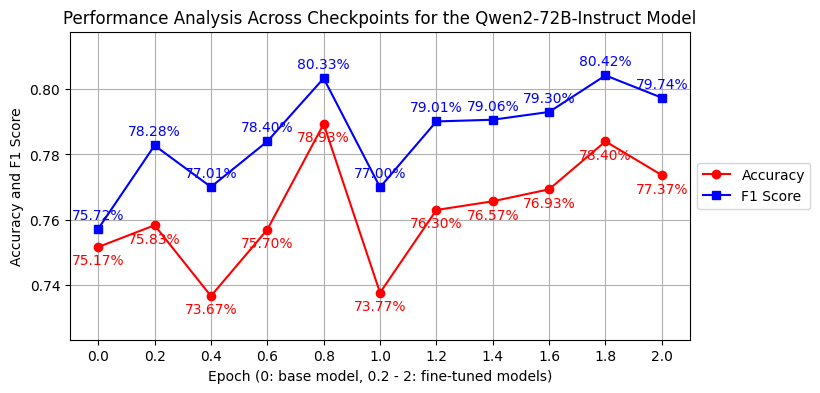

In [9]:
plot_metrics(perf_df, model_name)

In [10]:
perf_df.to_csv(metrics_csv, index=False)

In [11]:
perf_df_shots = get_metrics_df(df, variant="shots")
perf_df_shots

columns: ['Qwen/Qwen2-72B-Instruct_torch/shots-00']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:474: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


shots               model                                     run  accuracy  \
0     0  Qwen2-72B-Instruct  Qwen/Qwen2-72B-Instruct_torch/shots-00  0.751667   

   precision    recall       f1  ratio_valid_classifications  
0   0.794938  0.751667  0.75725                     0.977333

0: Qwen/Qwen2-72B-Instruct_torch/shots-00


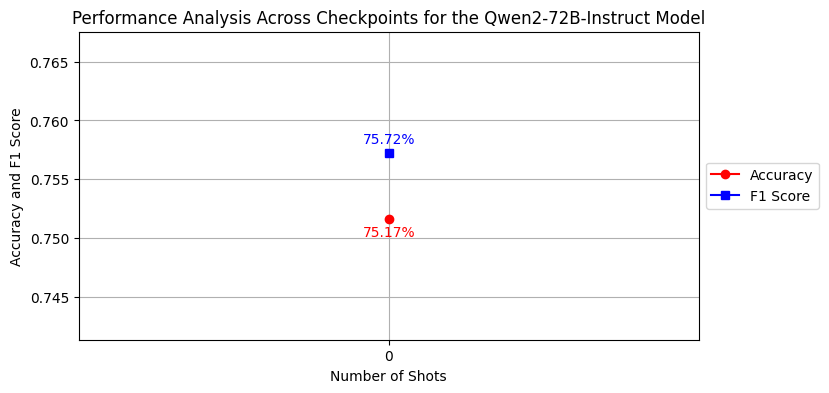

In [12]:
plot_metrics(perf_df_shots, model_name, variant="shots")

In [13]:
perf_df_shots.to_csv(
    metrics_csv.replace("metrics.csv", "shots_metrics.csv"), index=False
)

********** Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf
不是                                   1775
是                                     852
问法错误                                  140
不重要                                   122
回答正确                                   43
                                     ... 
不是\n\n破旧的帽子属于哭泣人的爷爷。                    1
不是\n\n请参与者提出完整的问题，以便我能更准确地回答。当前         1
是小男孩放的。                                 1
不是\n\n根据谜底，爷爷去年夏天已经因病去世，所以现在            1
不是\n\n（说明：参与者的问题实际上是在询问帽子的材质或者类型，       1
Name: count, Length: 69, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26681 (\N{CJK UNIFIED IDEOGRAPH-6839}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

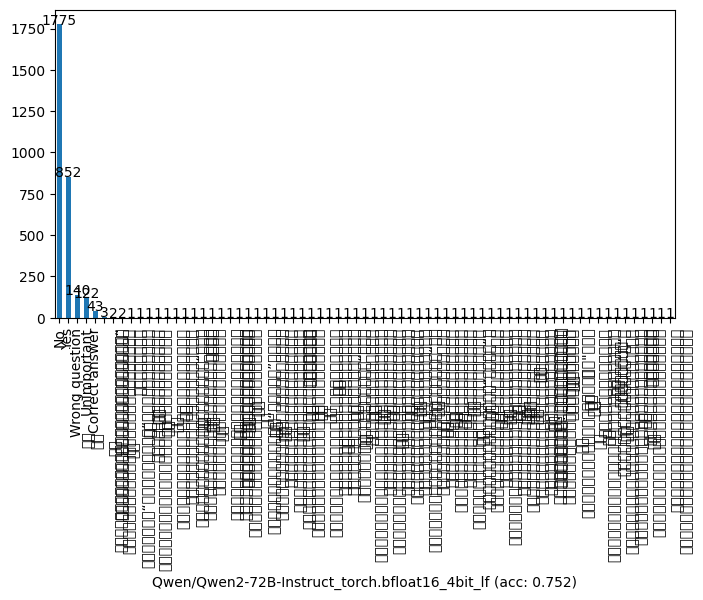

********** Qwen/Qwen2-72B-Instruct/checkpoint-35_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-35_torch.bfloat16_4bit_lf
不是      1412
是       1102
不重要      417
问法错误      39
回答正确      30
Name: count, dtype: int64


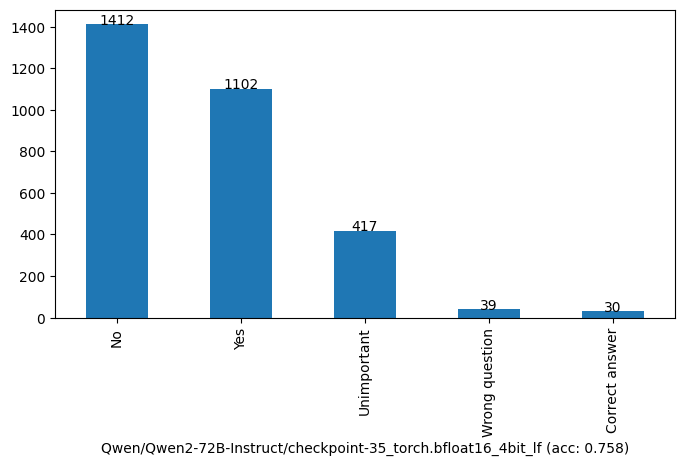

********** Qwen/Qwen2-72B-Instruct/checkpoint-70_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-70_torch.bfloat16_4bit_lf
不是      1340
是       1074
不重要      496
问法错误      59
回答正确      31
Name: count, dtype: int64


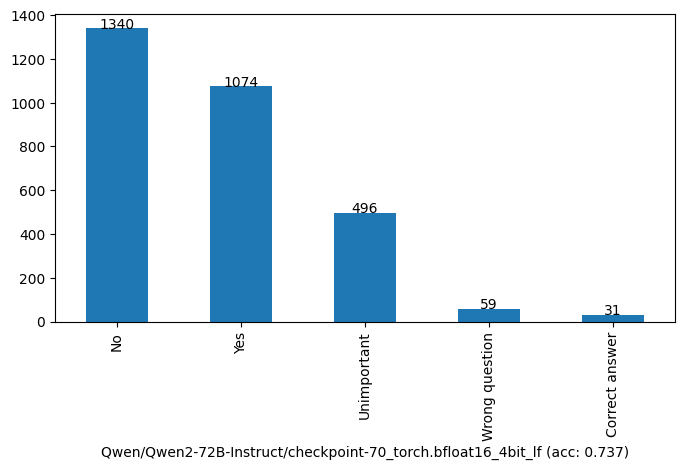

********** Qwen/Qwen2-72B-Instruct/checkpoint-105_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-105_torch.bfloat16_4bit_lf
不是      1355
是       1129
不重要      412
问法错误      77
回答正确      27
Name: count, dtype: int64


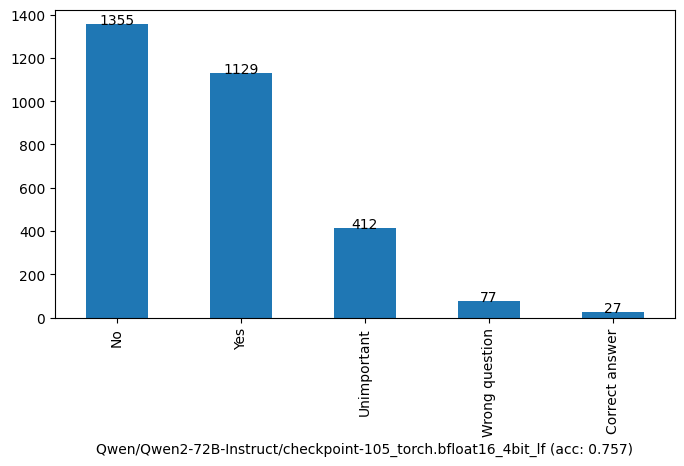

********** Qwen/Qwen2-72B-Instruct/checkpoint-140_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-140_torch.bfloat16_4bit_lf
不是      1439
是       1181
不重要      285
问法错误      62
回答正确      33
Name: count, dtype: int64


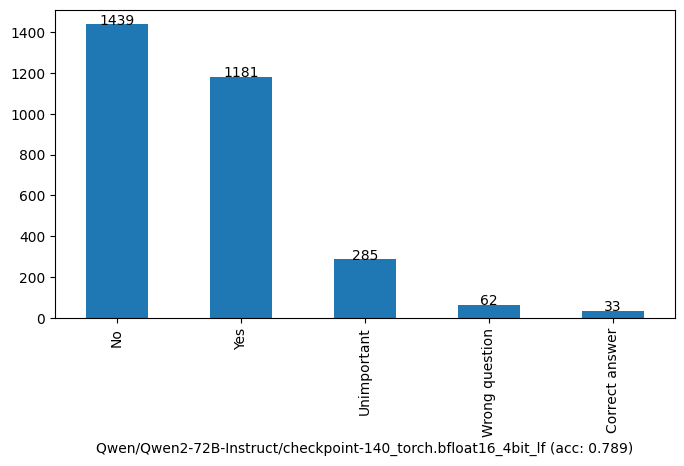

********** Qwen/Qwen2-72B-Instruct/checkpoint-175_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-175_torch.bfloat16_4bit_lf
不是      1245
是       1155
不重要      504
问法错误      63
回答正确      33
Name: count, dtype: int64


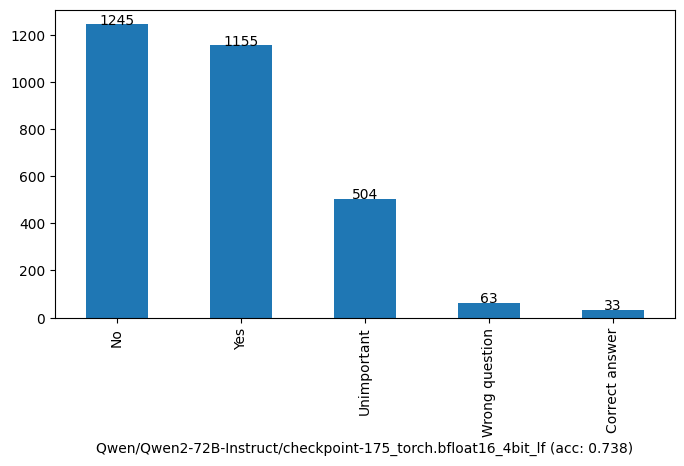

********** Qwen/Qwen2-72B-Instruct/checkpoint-210_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-210_torch.bfloat16_4bit_lf
不是      1329
是       1144
不重要      413
问法错误      76
回答正确      38
Name: count, dtype: int64


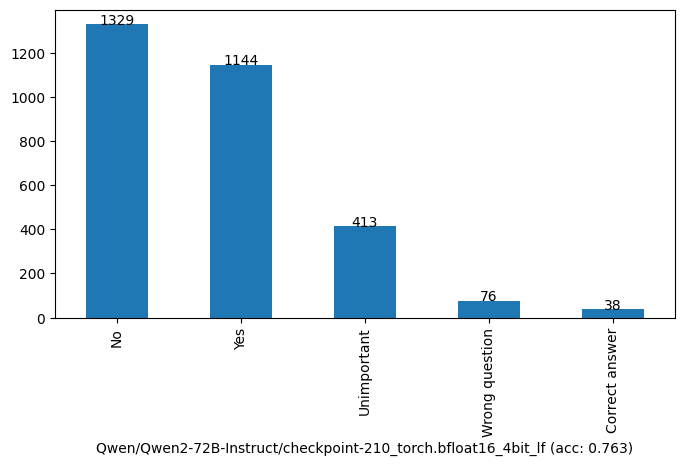

********** Qwen/Qwen2-72B-Instruct/checkpoint-245_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-245_torch.bfloat16_4bit_lf
不是      1368
是       1129
不重要      402
问法错误      67
回答正确      34
Name: count, dtype: int64


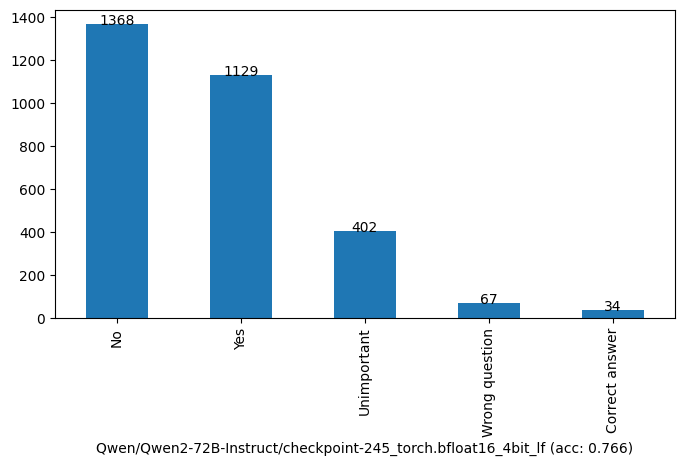

********** Qwen/Qwen2-72B-Instruct/checkpoint-280_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-280_torch.bfloat16_4bit_lf
不是      1370
是       1138
不重要      390
问法错误      67
回答正确      35
Name: count, dtype: int64


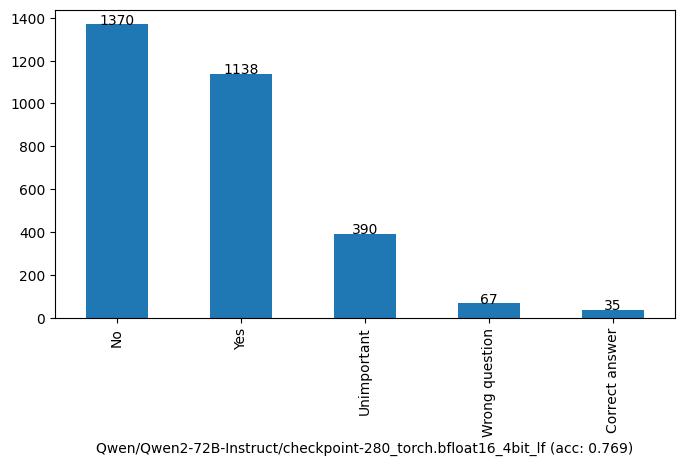

********** Qwen/Qwen2-72B-Instruct/checkpoint-315_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-315_torch.bfloat16_4bit_lf
不是      1407
是       1135
不重要      365
问法错误      60
回答正确      33
Name: count, dtype: int64


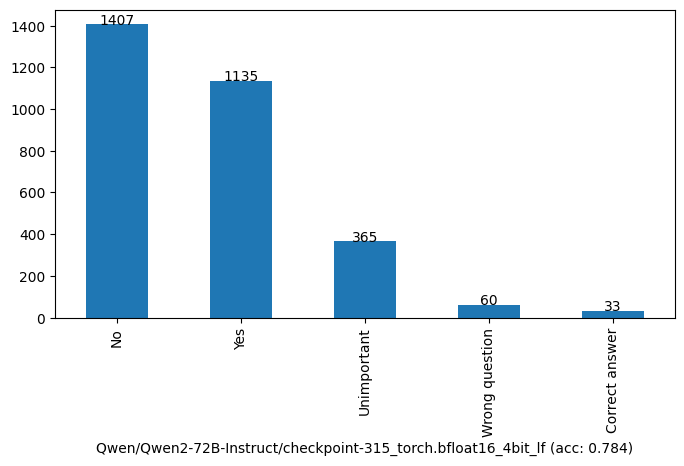

********** Qwen/Qwen2-72B-Instruct/checkpoint-350_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-350_torch.bfloat16_4bit_lf
不是      1387
是       1127
不重要      387
问法错误      64
回答正确      35
Name: count, dtype: int64


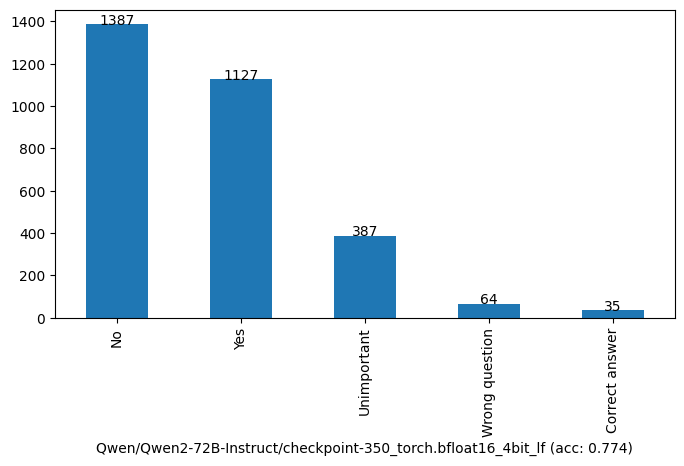

In [14]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})")

********** Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf
不是                                   1775
是                                     852
问法错误                                  140
不重要                                   122
回答正确                                   43
                                     ... 
不是\n\n破旧的帽子属于哭泣人的爷爷。                    1
不是\n\n请参与者提出完整的问题，以便我能更准确地回答。当前         1
是小男孩放的。                                 1
不是\n\n根据谜底，爷爷去年夏天已经因病去世，所以现在            1
不是\n\n（说明：参与者的问题实际上是在询问帽子的材质或者类型，       1
Name: count, Length: 69, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36825 (\N{CJK UNIFIED IDEOGRAPH-8FD9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39030 (\N{CJK UNIFIED IDEOGRAPH-9876}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24125 (\N{CJK UNIFIED IDEOGRAPH-5E3D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

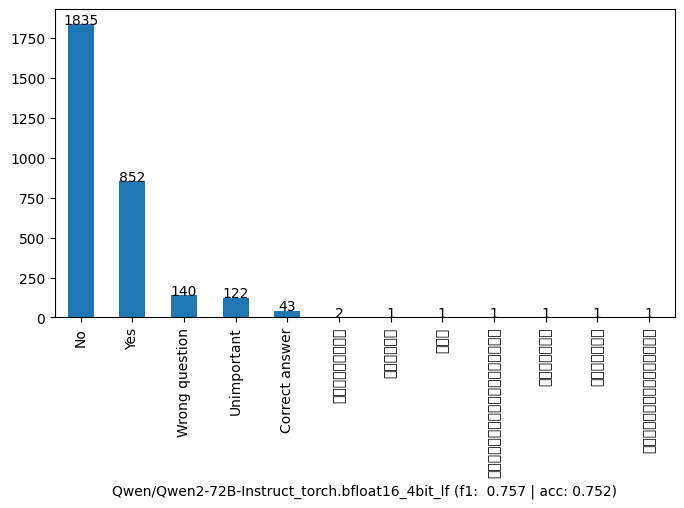

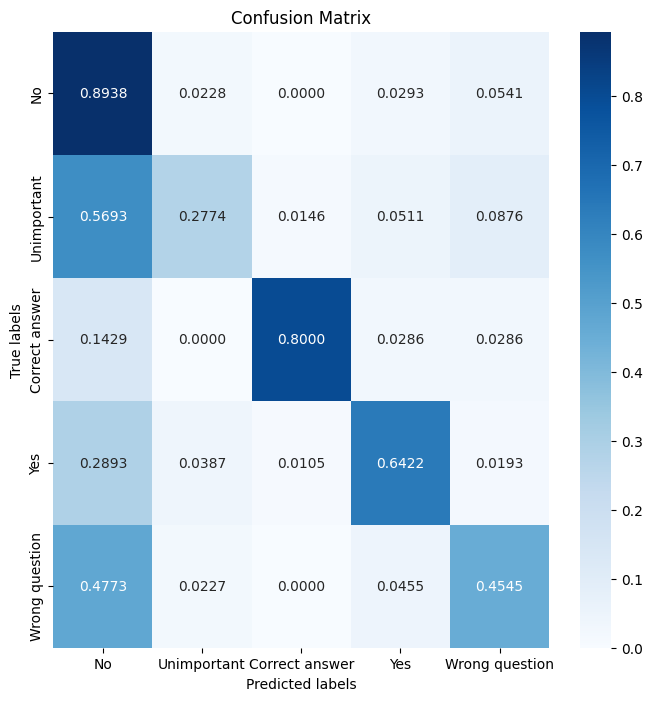

********** Qwen/Qwen2-72B-Instruct/checkpoint-35_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-35_torch.bfloat16_4bit_lf
不是      1412
是       1102
不重要      417
问法错误      39
回答正确      30
Name: count, dtype: int64


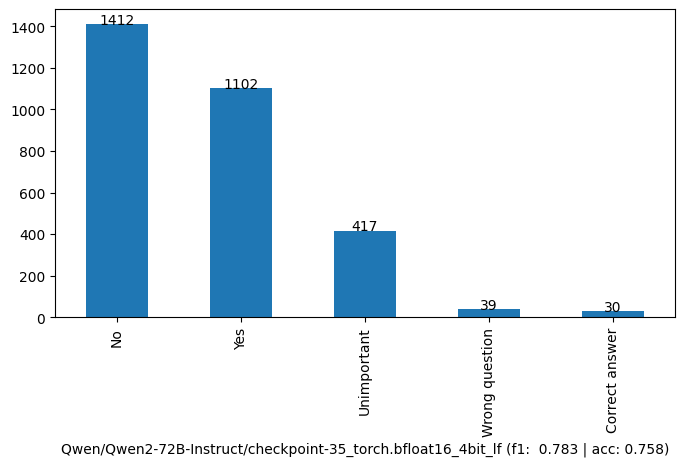

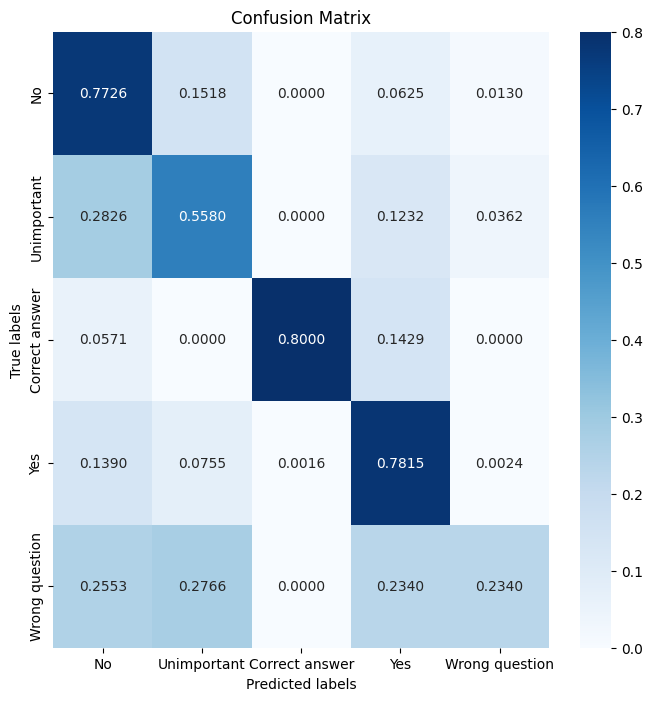

********** Qwen/Qwen2-72B-Instruct/checkpoint-70_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-70_torch.bfloat16_4bit_lf
不是      1340
是       1074
不重要      496
问法错误      59
回答正确      31
Name: count, dtype: int64


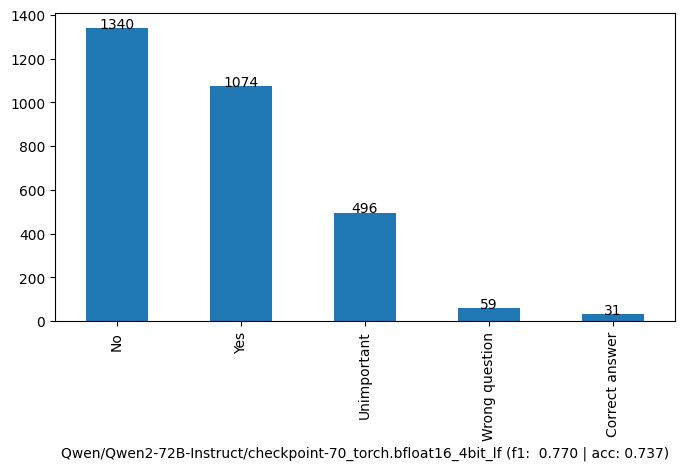

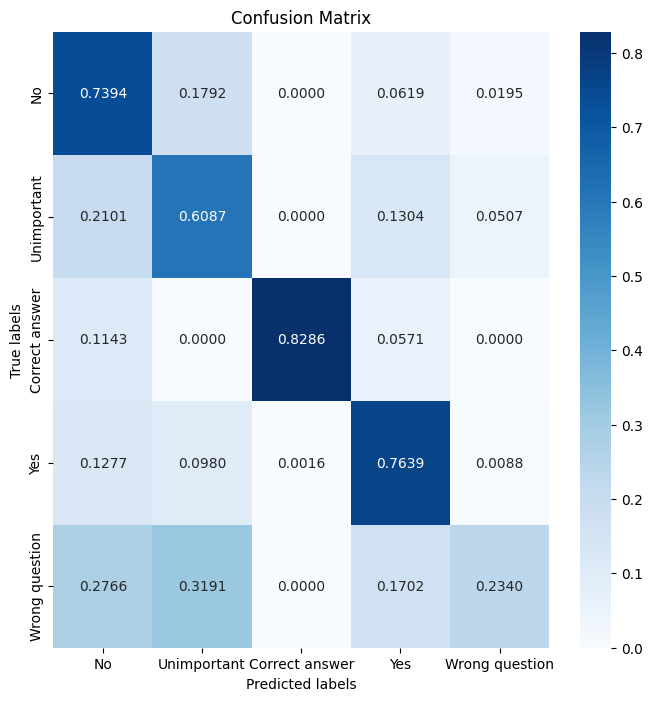

********** Qwen/Qwen2-72B-Instruct/checkpoint-105_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-105_torch.bfloat16_4bit_lf
不是      1355
是       1129
不重要      412
问法错误      77
回答正确      27
Name: count, dtype: int64


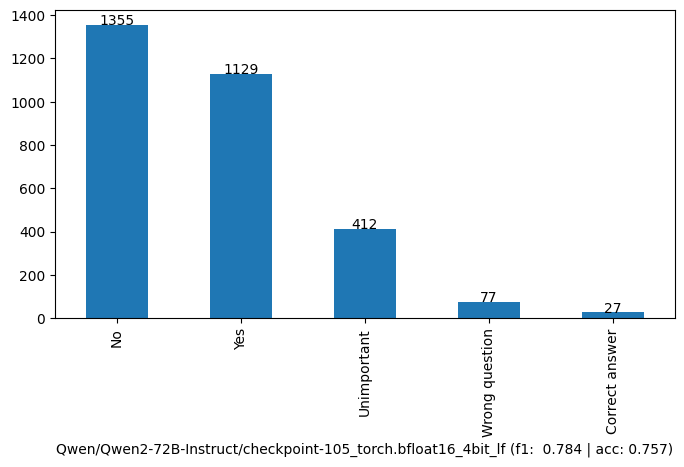

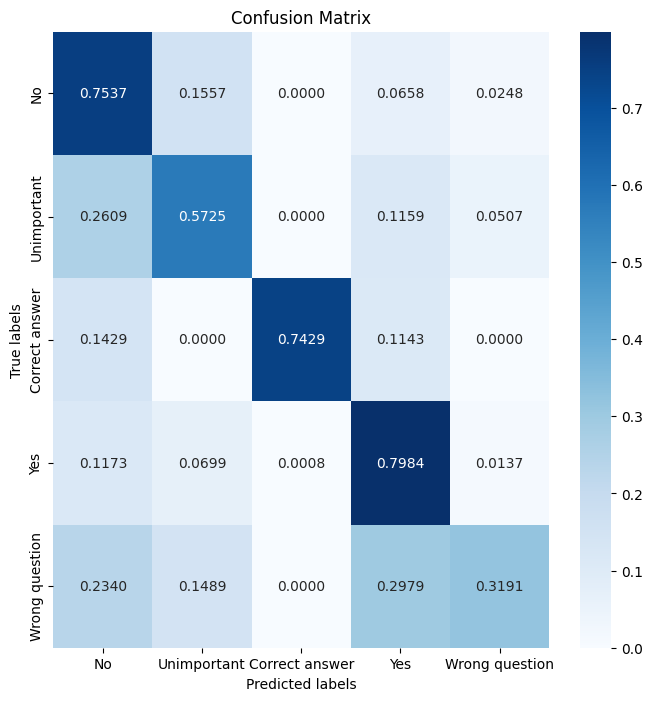

********** Qwen/Qwen2-72B-Instruct/checkpoint-140_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-140_torch.bfloat16_4bit_lf
不是      1439
是       1181
不重要      285
问法错误      62
回答正确      33
Name: count, dtype: int64


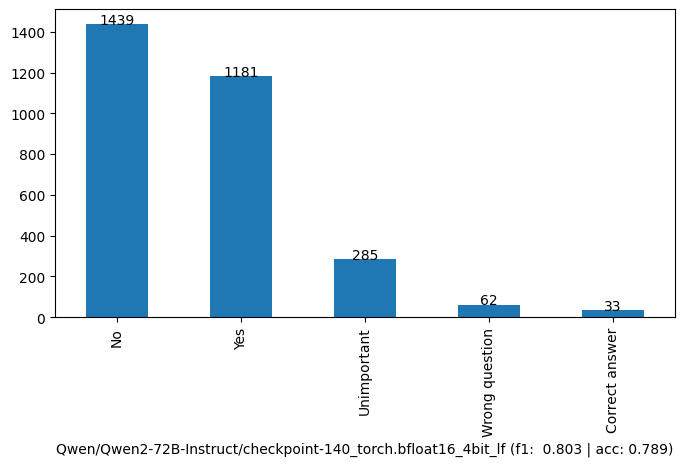

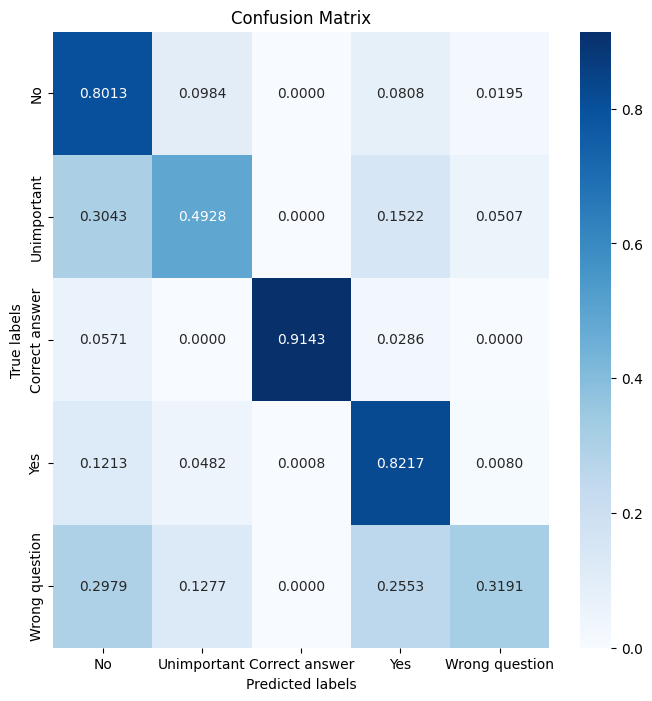

********** Qwen/Qwen2-72B-Instruct/checkpoint-175_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-175_torch.bfloat16_4bit_lf
不是      1245
是       1155
不重要      504
问法错误      63
回答正确      33
Name: count, dtype: int64


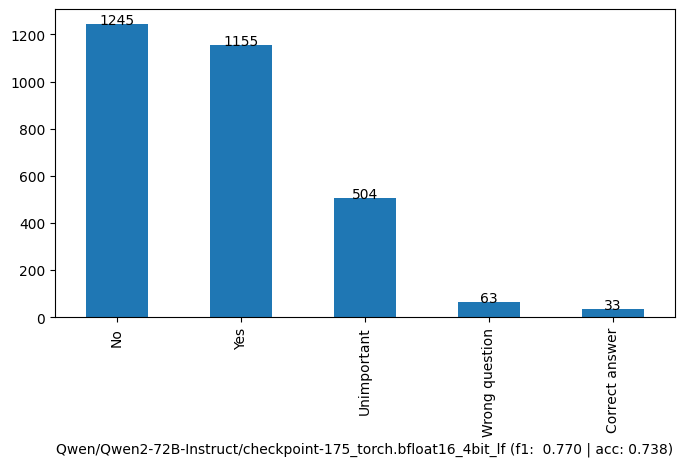

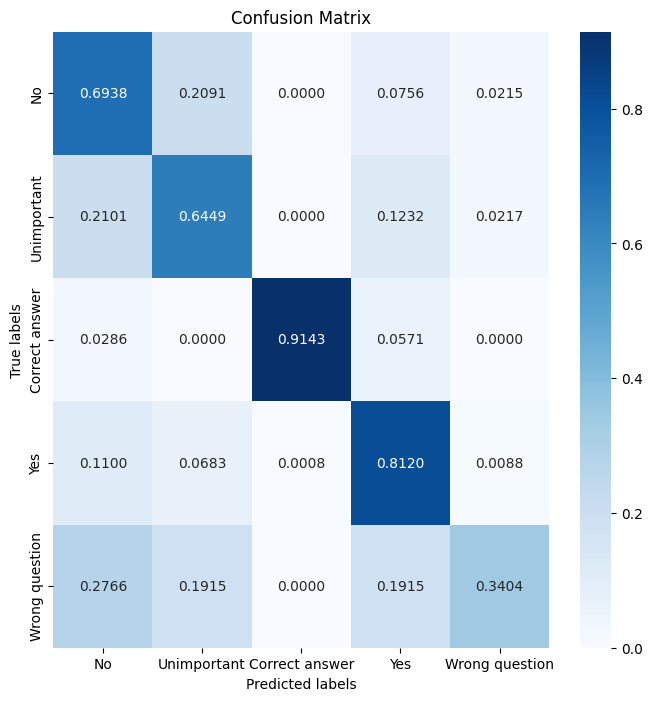

********** Qwen/Qwen2-72B-Instruct/checkpoint-210_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-210_torch.bfloat16_4bit_lf
不是      1329
是       1144
不重要      413
问法错误      76
回答正确      38
Name: count, dtype: int64


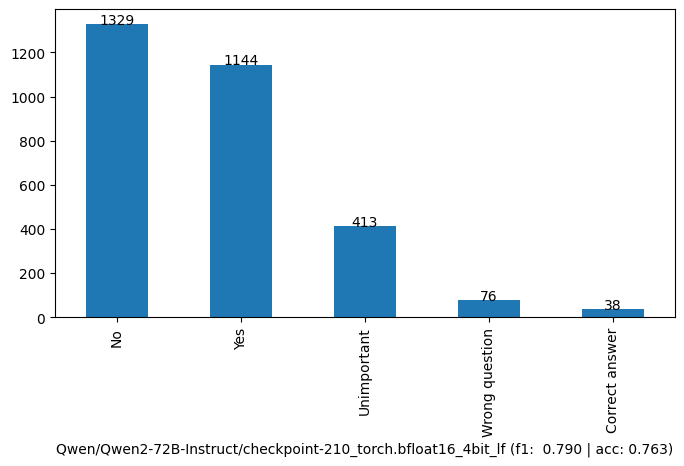

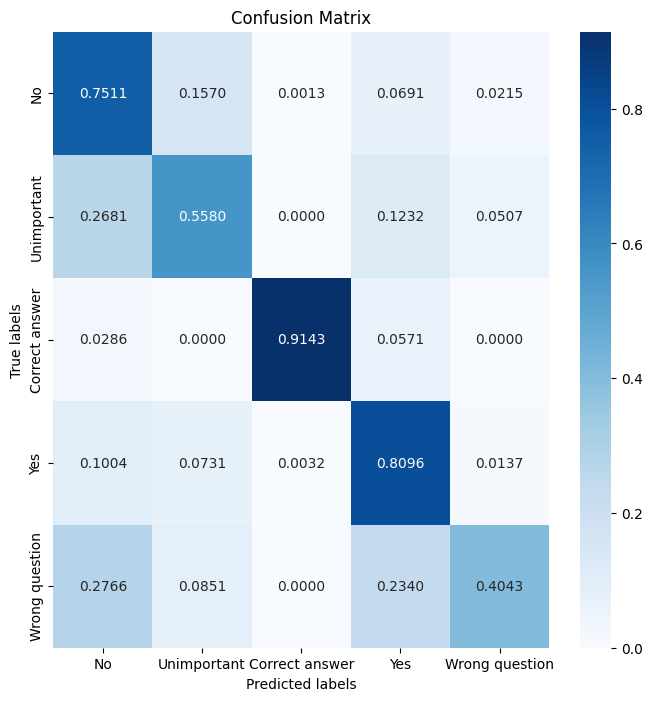

********** Qwen/Qwen2-72B-Instruct/checkpoint-245_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-245_torch.bfloat16_4bit_lf
不是      1368
是       1129
不重要      402
问法错误      67
回答正确      34
Name: count, dtype: int64


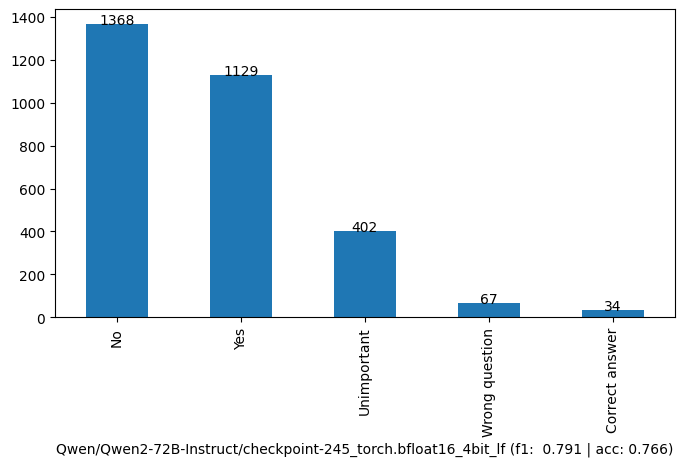

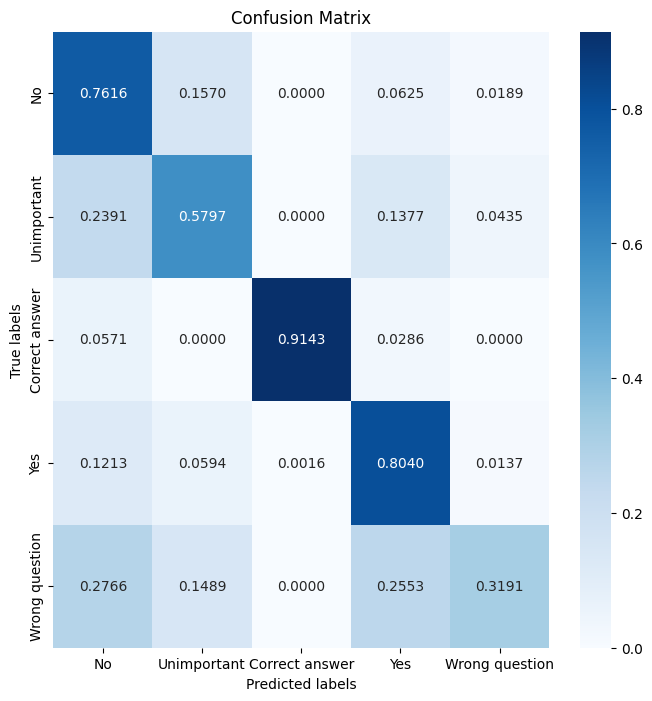

********** Qwen/Qwen2-72B-Instruct/checkpoint-280_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-280_torch.bfloat16_4bit_lf
不是      1370
是       1138
不重要      390
问法错误      67
回答正确      35
Name: count, dtype: int64


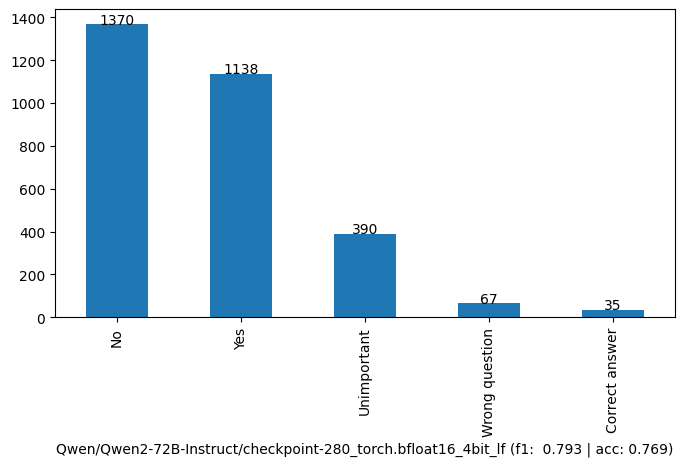

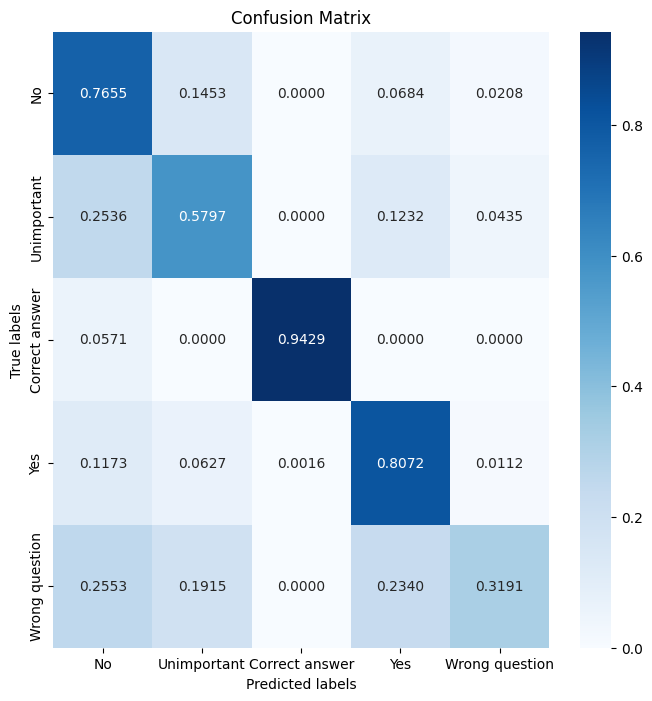

********** Qwen/Qwen2-72B-Instruct/checkpoint-315_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-315_torch.bfloat16_4bit_lf
不是      1407
是       1135
不重要      365
问法错误      60
回答正确      33
Name: count, dtype: int64


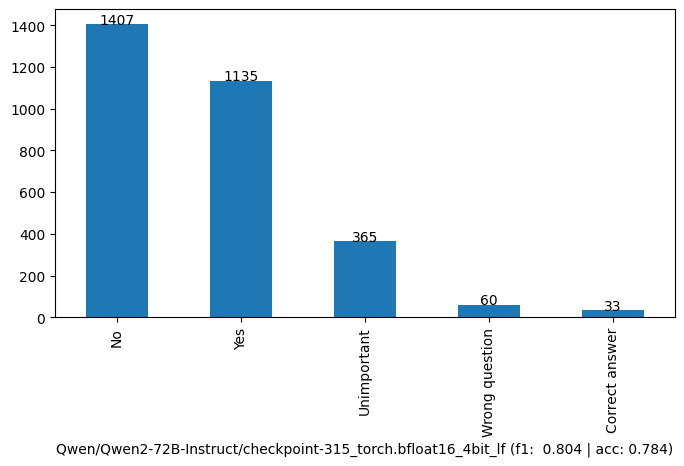

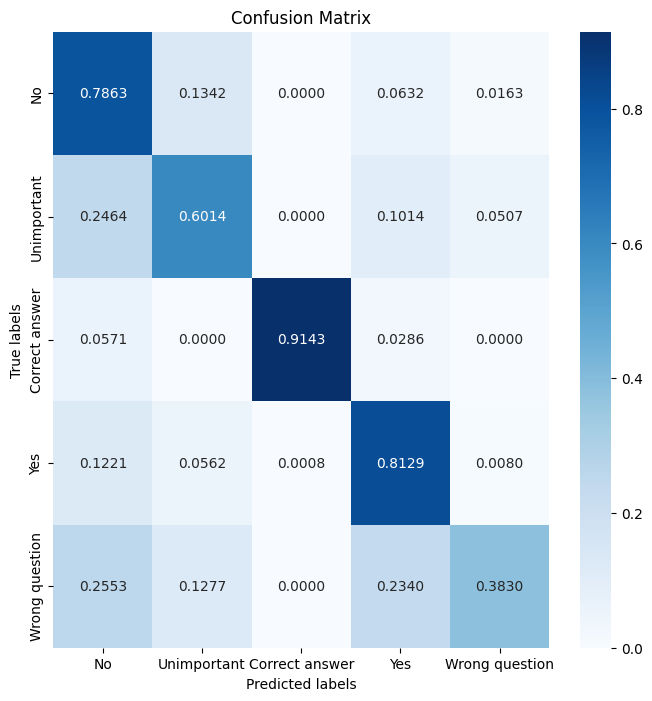

********** Qwen/Qwen2-72B-Instruct/checkpoint-350_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-350_torch.bfloat16_4bit_lf
不是      1387
是       1127
不重要      387
问法错误      64
回答正确      35
Name: count, dtype: int64


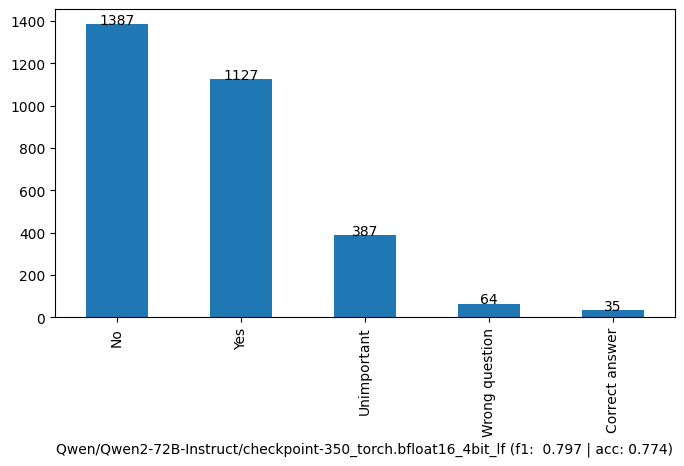

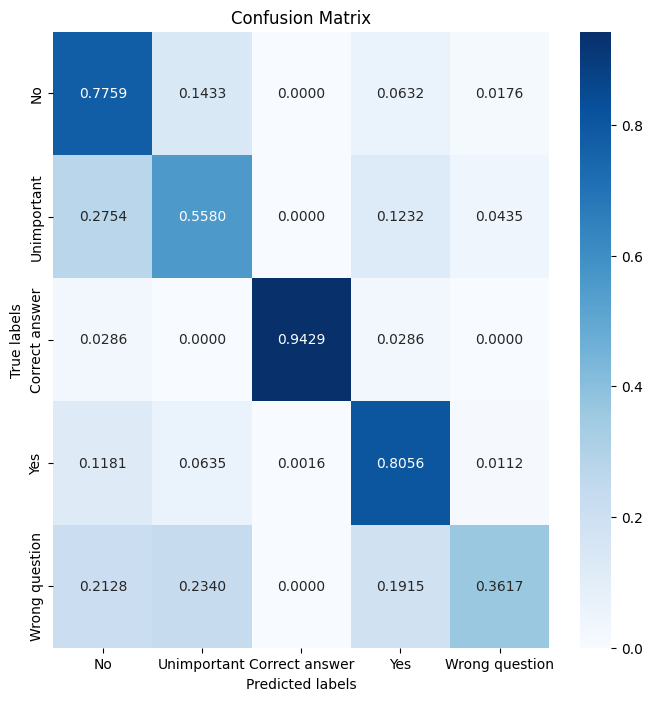

In [15]:
for col, f1, accuracy in zip(
    df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )

********** Qwen/Qwen2-72B-Instruct_torch/shots-00 **********
Qwen/Qwen2-72B-Instruct_torch/shots-00
不是                                   1775
是                                     852
问法错误                                  140
不重要                                   122
回答正确                                   43
                                     ... 
不是\n\n破旧的帽子属于哭泣人的爷爷。                    1
不是\n\n请参与者提出完整的问题，以便我能更准确地回答。当前         1
是小男孩放的。                                 1
不是\n\n根据谜底，爷爷去年夏天已经因病去世，所以现在            1
不是\n\n（说明：参与者的问题实际上是在询问帽子的材质或者类型，       1
Name: count, Length: 69, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36825 (\N{CJK UNIFIED IDEOGRAPH-8FD9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39030 (\N{CJK UNIFIED IDEOGRAPH-9876}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24125 (\N{CJK UNIFIED IDEOGRAPH-5E3D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

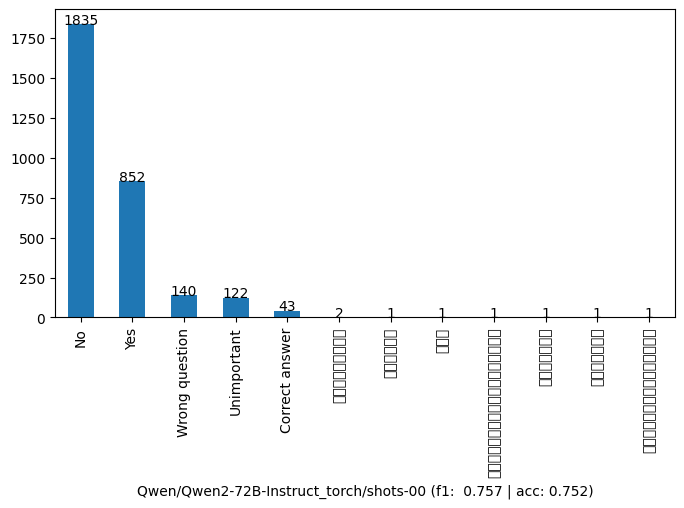

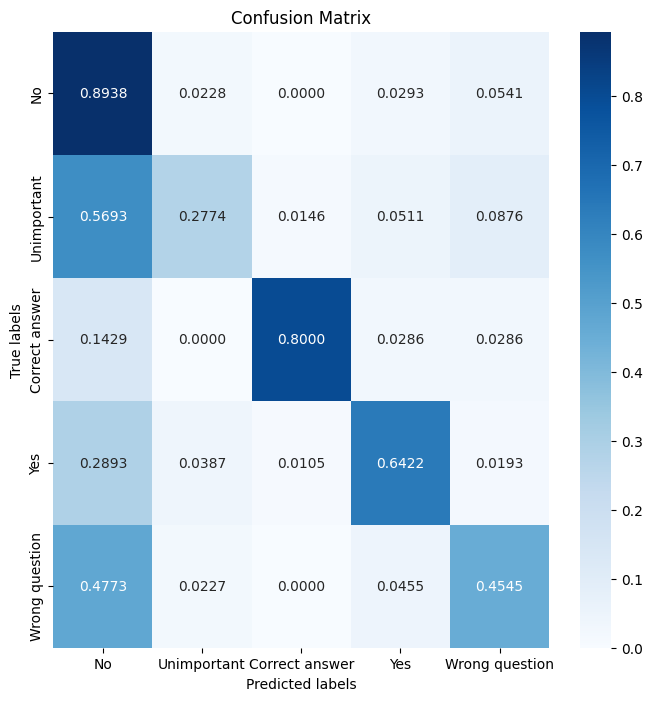

In [16]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )